In [40]:
import random
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
from IPython.display import clear_output
from keras.utils import to_categorical
import seaborn as sns
import random
import numpy as np
import tensorflow as tf
from collections import deque
from tensorflow import keras
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras import layers
from keras.models import load_model
sns.set()
# We import the agents and the environment from the 
# modules created in advance.
from Modules.rlagents import Q_Learning, DoubleDQN

class Two_Layers_single_output(object):
    def __init__(self, input_size, learning_rate=0.01):
        """ This class is just a two-layer Keras neural network to process the
        data taken by the experimenter to produce a single output.

        :param input_size: Number of inputs feeded to the analyzer
        :type input_size: int
        :param learning_rate: Gradient descent (Adam) learning rate, defaults 
                              to 0.001
        :type learning_rate: float, optional
        """        
        self.input_size = input_size
        self.learning_rate = learning_rate
        self.model = self.build_model()

    def build_model(self):
        """Uses keras to build de model. You should modify here the code to
        change the neural network architecture. Default to a 
        *input_sizex16x16x1* fully connected sequential network.
        
        :return: Keras model for the agent using the specified structure. 
        :rtype: keras model
        """        
        model = Sequential([
        layers.Dense(4,activation = 'sigmoid', input_shape=[self.input_size]),
        layers.Dense(4)
        layers.Dense(1)
        ])
        optimizer = Adam(self.learning_rate)
        model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
        return model
    def train(self, X_train, y_train):
        """ Fit the model with the given data an target.
        
        :param X_train: Input data for the model
        :type X_train: Keras valid input data 
        :param y_train: Target value for the input data
        :type y_train: numpy array / float
        """        
        self.model.fit(X_train, y_train, batch_size=1, epochs = 1, verbose = 0)
        
    def predict(self, X_test):
        """ Uses the model to predict a value
        
        :param X_test: Input data for the model
        :type X_test: Keras valid input data
        :return: Prediction of the target value
        :rtype: numpy array/float
        """        
        return self.model.predict(X_test)

class Bandit(object):
    def __init__(self, n_arms=2, x_min=0, x_max=10, max_reward=1):
        self.max_reward = max_reward
        self.n_arms = n_arms
        self.x_min = x_min
        self.x_max = x_max
        self.target_arm = random.randint(0, n_arms-1)
        self.total_reward = 0
        reward = 0
    
    def generate_values(self):
        self.x_arms=[]
        for i in range(0, self.n_arms):
            self.x_arms.append(random.uniform(self.x_min,self.x_max))
    def take_action(self, action):
        return self.x_arms[action]
    def test(self):
        test_pre = random.uniform(self.x_min,self.x_max)
        test_post = test_pre*self.x_arms[self.target_arm]
        return test_pre, test_post
    
    def give_reward(self, prediction, observed, sigma=0.05):
        x = (observed-prediction)/observed
        reward = self.max_reward*np.exp(-0.5*(x/sigma)**2)
        self.total_reward = self.total_reward + reward
        return reward
    def reshape_for_analyzer(self, measurements, target):
        """ Reshapes the measurements and the target value in a suitable
        format for a Keras analyzer
        
        :param measurements: Measurements to give the Analyzer to make the 
                             prediction
        :type measurements: numpy array
        :param target: Target value to fit.
        :type target: float
        :return: X_train (inputs to the Analyzer), y_train (Target value to fit)
        :rtype: pandas DataFrame, pandas DataFrame
        """        
        X_train = pd.DataFrame(measurements.reshape(-1,len(measurements)))
        y_train = pd.DataFrame(target*np.ones((1,1)))
        return X_train, y_train
    def get_measurements(self, action1, test_in):
        """ Transforms the actions and the environmental elements into an array
        to feed the Analyzer.
        
        :param action1: Action performed by the first experimenter.
        :type action1: int
        :param outcome1: Outcome of the first use of the sensors.
        :type outcome1: float / int
        :param action2: Action performed by the second experimenter.
        :type action2: int
        :param outcome_2: Outcome of the second use of the sensors.
        :type outcome_2: float / int
        :param V: Velocity of the test bullet.
        :type V: float
        :return: Numpy array containing all the arguments
        :rtype: numpy array
        """        
        return np.array([action1, test_in])    

SyntaxError: invalid syntax (<ipython-input-40-5829dfe9d0ad>, line 51)

10000/10000 episodes(100.0%)
Elapsed time: 1 min 15s
Est. completion time: 1 min 15s,
        Est. remaining time: 0 min 0s
Training completed!


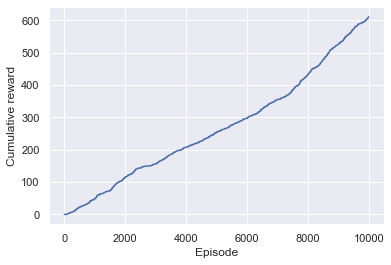

,Target arm,Target arm value,Action 1,Outcome 1,Test_in,Reward,Predicted_out,Test_out,Exploration rate
0,1,9.068,1,9.068,2.291,0.000,0.000,20.776,1.0
1,1,9.804,0,9.597,0.086,0.000,0.524,0.841,1.0
2,1,9.000,1,9.000,5.418,0.000,1.504,48.764,1.0
3,1,9.017,1,9.017,8.332,0.000,2.464,75.133,1.0
4,1,8.851,1,8.851,1.644,0.000,1.769,14.548,1.0
...,...,...,...,...,...,...,...,...,...
9995,1,2.138,1,2.138,5.138,0.081,9.753,10.985,-0.0
9996,1,7.056,1,7.056,7.323,0.443,48.373,51.668,-0.0
9997,1,2.706,1,2.706,4.238,0.004,9.554,11.468,-0.0
9998,1,6.963,1,6.963,9.747,0.334,72.900,67.872,-0.0


In [36]:
# CONSTANTS, INSTANTIATIONS, INITIALIZATION ===============================

N_Episodes = 10000 # Number of episodes to train 
count = 0 # Initialization of a counter
n_arms = 2
# We instantiate the classes of each element
experimenter = Q_Learning(iterations=N_Episodes, output_size=n_arms)
analyzer = Two_Layers_single_output(input_size=2,learning_rate=0.1)
env = Bandit(n_arms=n_arms)
# Save time for verbose purposes
t0 = time.time()
t1 = time.time()

# First random initialization of the variables. This part is needed since 
# some recurrent parts of the loop need from some data to start with.
env.generate_values()
test_in, test_out = env.test()
action1 = experimenter.get_next_action()
outcome1 = env.take_action(action1)
y_predicted = [0]
reward = 0

# Auxiliar variables for collecting data
values = []
df=pd.DataFrame(columns = ['Target arm','Target arm value', 'Action 1', 
                           'Outcome 1', 'Test_in', 'Reward', 
                           'Predicted_out', 'Test_out', 'Exploration rate'])
total_reward_list = []

# MAIN LOOP =================================================================

while count < N_Episodes:
    
    values.append([env.target_arm, env.x_arms[env.target_arm], 
                   action1, outcome1, test_in,  float(reward),
                   y_predicted[0], test_out, experimenter.exploration_rate])
    total_reward_list.append(env.total_reward)
    env.generate_values()
    action1 = experimenter.get_next_action()
    outcome1 = env.take_action(action1)
    test_in, test_out = env.test()
    measurements = env.get_measurements(outcome1, test_in)
    X, y = env.reshape_for_analyzer(measurements, test_out)
    y_predicted = analyzer.predict(X)[0]
    analyzer.train(X, y)
    reward = env.give_reward(y_predicted, test_out)
    experimenter.update(action1, reward)

# Display training status....................................................
    count = count + 1
    refresh_rate = 2000
    if count % (N_Episodes/refresh_rate) == 0:
        clear_output()
        t2 = time.time()
        m, s = divmod(t2-t1, 60)
        mt, st = divmod(t2-t0, 60)
        me, se = divmod(((t2-t0)/count)*N_Episodes, 60)
        mr, sr = divmod(((t2-t0)/count)*N_Episodes-t2+t0, 60)
        print (str(int(count)) + '/' +  str(N_Episodes) + " episodes" + 
               '(' + str(100*count/N_Episodes)+ '%)')
        print('Elapsed time: {} min {}s'.format(int(mt), int(st)))
        print("""Est. completion time: {} min {}s,
        Est. remaining time: {} min {}s""".format(int(me), int(se), int(mr),
                                                  int(sr)))
        t1 = time.time()
print('Training completed!')


plt.plot(range(len(total_reward_list)), total_reward_list)
plt.ylabel("Cumulative reward")
plt.xlabel("Episode")
plt.show()


df=pd.DataFrame(values, columns = ['Target arm','Target arm value', 'Action 1', 
                           'Outcome 1', 'Test_in', 'Reward', 
                           'Predicted_out', 'Test_out', 'Exploration rate'])
df.to_csv('df_nuevo.csv')
df.round(3)

(0, 2)

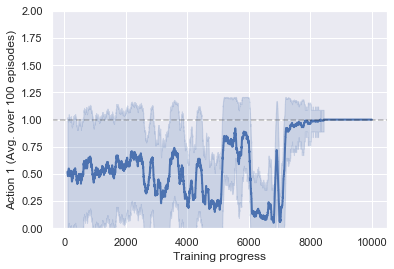

In [37]:
window=100
smooth_path= df['Action 1'].rolling(window=window).mean()
path_deviation = df['Action 1'].rolling(window=window).std()
under_line     = (smooth_path-path_deviation)
over_line      = (smooth_path+path_deviation)
plt.plot(smooth_path, linewidth=2, label ='Reward (moving avg)') 
plt.fill_between(path_deviation.index, under_line, over_line, color='b', alpha=0.2)
plt.axhline(y=env.target_arm,color='k',linestyle='--',alpha=0.3)
plt.xlabel('Training progress')
plt.ylabel('Action 1 (Avg. over ' + str(window) + ' episodes)')
plt.ylim(0,n_arms)


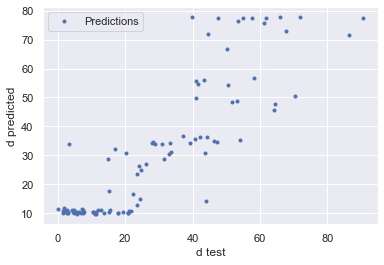

In [39]:
sample_size = 0.01
sample=df.loc[np.r_[N_Episodes-N_Episodes*sample_size:N_Episodes], :]
# We plot an histogram of the zone distribution to observe the expected
# unbalanced distribution of landing zones

plt.plot(sample['Test_out'], sample['Predicted_out'],'.',label="Predictions")
plt.xlabel('d test')
plt.ylabel('d predicted')
plt.legend()

,0,1
0,0.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,2.0
4,0.0,2.0
...,...,...
9995,0.0,3200.0
9996,0.0,3200.0
9997,0.0,3200.0
9998,0.0,3200.0


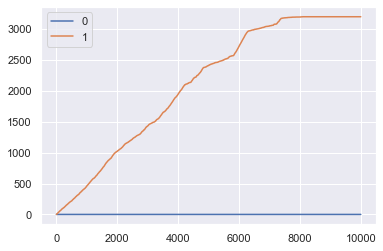

In [35]:
list = np.zeros((len(df),n_arms))
count = 0
for i in range(len(df)):
    sample=df.loc[np.r_[0:i], :]
    for j in range(1,n_arms):
        list[i,j] = sample[sample['Action 1']==j]['Action 1'].sum()/j
a=pd.DataFrame(list)
for i in range(n_arms):
    plt.plot(range(len(a)),a[i],label = str(i))
plt.legend() 
a